# Iris Plants Classification

Supervised learning can be divided into regression and classification problems. It has a purpose to construct a mapping function from input/independent variables (X) to an output/dependent variable (y). 

The difference is that, the output of regression is a continuous value. However, the output of classification is categorical.

In this project, we will conduct the classification project to predict a discrete value, which are only able to have certain values. The values can be numeric such as the number of people in a meeting room, or categorical such as purple, yellow, and green.

Some examples in categorical form including a breast cancer prediction, image recognition, and spam email detection. So these examples will be represented in a finite number of classes.

Some classification algorithms include logistic regression, k nearest neighbors, decision trees, naive bayes, support vector machines, neural networks, etc. However, in this project, we will use k nearest neighbors to classify iris species.

## Binary and Multi-class

Binary classification is the classification which has two classes to predict (binary). For example a malignant or benign tumor. 

Multi-classification problem is the classification which has more than two classes. For example, Iris species which have sepal and petal containing versicolor, virqinica, or setosa types.

## Exploratory Data Analysis (EDA)

### Iris dataset

In this project, we will predict the type of iris, whether it is a setosa, versicolor, or even virginica. The dataset consists of 150 iris plants, with 4 continous attributes namely sepal_length (cm), sepal_width (cm), petal_length (cm), and petal_width (cm).

In [1]:
import pandas as pd

iris_df = pd.read_csv("iris.csv")

#To view the first 5 rows
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# To inspect the dimensions
iris_df.shape

(150, 5)

In [3]:
#To make sure the whole dataset having no null values
col = iris_df.columns

for column in col:

    #isnull() will return "False" if the valuse is not null for each row
    print(iris_df[column].isnull().value_counts())

False    150
Name: sepal_length, dtype: int64
False    150
Name: sepal_width, dtype: int64
False    150
Name: petal_length, dtype: int64
False    150
Name: petal_width, dtype: int64
False    150
Name: species, dtype: int64


There are no missing values in any of the columns. So, this is a clean dataset.

In [4]:
#Count the unique values in column species of iris
iris_df.groupby("species").size() 

species
setosa        50
versicolor    50
virginica     50
dtype: int64

It is necessary to know whether the data is balanced or imbalanced.

From the dataset, we found that it contains 3 classes of 50 instances each, so it is a balanced dataset as the data points for each class are evenly distributed.

An imbalanced dataset is one where the classes within the data are not equally represented. When the dataset is imbalanced, a slightly different analysis will be used. 

The example of an imbalanced dataset is fraud. Generally only a small percentage of the total number of transactions is actual fraud (about 1 in 1000)

is the same as:

In [5]:
#To show desscriptive statistics()
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The scaling feature can be useful to standardize attributes (each feature has a mean of zero and a standard deviation of one), and important in the preprocessing step for many machine learning algorithms. 

However, from the dataset. the ranges of attributes are still similar magnitude, so we can skip standardization.

## Data visualization

### Univariate Plot

To better understand each attribute, we can start with the univariate plot, that is, plots of each individual variable.
Some examples of univariate plots including density, histogram, and boxplots. 

Histograms are a type of bar chart that displays the counts or relative frequencies of values falling in different class intervals or ranges.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


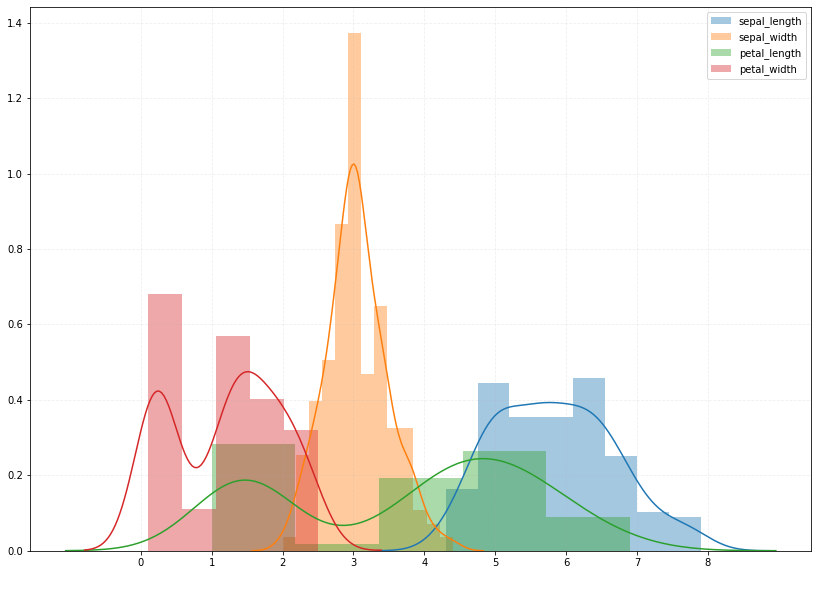

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (14, 10))
plt.grid(alpha = 0.20, linestyle = '--')

cols = iris_df.columns

i = 0
for i in range(0, 4) :
    print(sns.distplot(iris_df[cols[i]], label = iris_df[cols[i]].name))
    i = i+1

plt.xticks(range(0, 9, 1))
plt.xlabel(" ")
plt.legend()

This gives us a much clearer idea of the distribution of the input variable, showing that both sepal length and sepal width have a normal (Gaussian) distribution. That is, the distribution has a beautiful symmetric bell shape. 

However, the length of petals is not normal. Its plot shows two modes, one peak happening near 0 and the other around 5. Less patterns were observed for the petal width.

### Multivariate Plot 

In the multivariate plot, we will apply scatter plots to help spot structured relationships between features. Firstly, we can use correlation matrix to identify the high correlation between attributes.

In [7]:
iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Interestingly, based on the correlation matrix, we can see that the length and width of the petal are highly correlated. So these two features are very useful to identify various iris species.

We will use scatter plots to see the interactions between attributes. We also apply a different style and color for each species to differentiate the plots visually, since it is difficult to see without any indication of the true species of the flower that a datapoint represents. 

Text(0, 0.5, 'Petal Width (CM)')

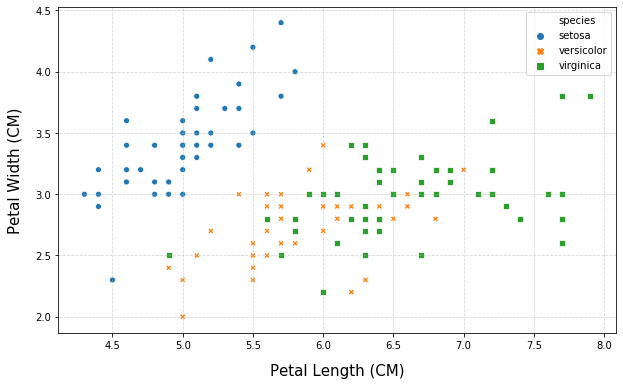

In [8]:
plt.figure(figsize = (10, 6))
plt.grid(alpha = 0.50, linestyle = '--')

sns.scatterplot(data = iris_df, 
                x = 'sepal_length', 
                y = 'sepal_width', 
                style = 'species',
                hue = 'species')

plt.xlabel("Petal Length (CM)", size = 15, labelpad = 13)
plt.ylabel("Petal Width (CM)", size = 15, labelpad = 13)

Using sepal_length and sepal_width features, we can distinguish iris-setosa from others; separating iris-versicolor from iris-virginica is harder because of the overlap as seen by the green and yellow datapoints.

Text(0, 0.5, 'Petal Width (CM)')

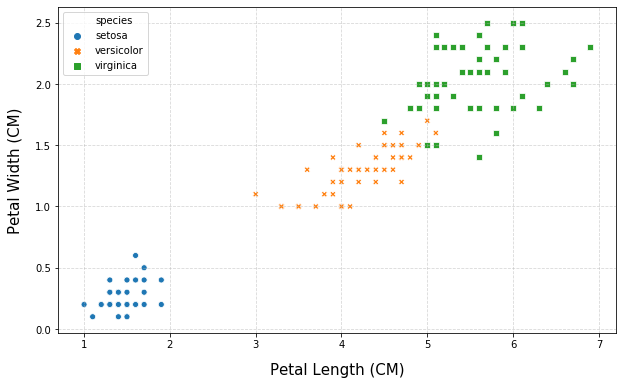

In [9]:
plt.figure(figsize = (10, 6))
plt.grid(alpha = 0.50, linestyle = '--')

sns.scatterplot(data = iris_df, 
                x = 'petal_length', 
                y = 'petal_width', 
                style = 'species',
                hue = 'species')

plt.xlabel("Petal Length (CM)", size = 15, labelpad = 13)
plt.ylabel("Petal Width (CM)", size = 15, labelpad = 13)

When the length and width of the petal are highly correlated, these two features are still better to distinguish various iris species.

Still keep in mind that the boundary between versicolor and virginica remains a bit fuzzy, referring to the difficulties for the classifiers. It is worth reminder when training to decide which features we should use.

##  K nearest neighbors

K nearest neighbors (KNN) is a supervised machine learning model and non-parametric analysis that takes a data point, looks at its 'k' closest labeled data points, and assigns the label by a majority vote. 

We will see the changing K could affect the output of the model. In KNN, K is considered as a hyperparameter, whose value is set before the learning process begins.

In scikit-learn, the KNN algorithm is implemented in sklearn.neighbors module:

https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.analyticsvidhya.com%2Fblog%2F2018%2F03%2Fintroduction-k-neighbours-algorithm-clustering%2F&psig=AOvVaw2b7BnoLQrrz10FG28PiRy1&ust=1597845724889000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCICko7L1pOsCFQAAAAAdAAAAABAD![image.png](attachment:image.png)

KNN can also be used for regression problems. The difference lies in prediction. Instead of a majority vote, KNN for regression makes a prediction using the mean labels of the K closest data points.

## Modelling

### Data preparation

Earlier we identified that the length and the width of the petals are the most useful features to separate the species

In [10]:
iris_df[["petal_width", "petal_length", "species"]].head()

,petal_width,petal_length,species
0,0.2,1.4,setosa
1,0.2,1.4,setosa
2,0.2,1.3,setosa
3,0.2,1.5,setosa
4,0.2,1.4,setosa


Let's define the features and labels as follows:

In [11]:
X = iris_df[["petal_width", "petal_length"]]
y = iris_df["species"]

To assess the performance of the model, we divide the portion of data as a training and test set to mimic the unknown data the model will be presented with in the future. We use train_test_split in sklearn.model_selection to split the data into training and test set.

In classification, stratified sampling is often chosen to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set.

We divide 70% of the data is for training and 30% for testing. We also specified the split was stratified by label (y). This is done to ensure that the distribution of labels remains similar in both train and test sets.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.70, 
                                                    random_state = 1, 
                                                    stratify = y)

print(y_train.value_counts())
print(y_test.value_counts())

setosa        35
virginica     35
versicolor    35
Name: species, dtype: int64
virginica     15
setosa        15
versicolor    15
Name: species, dtype: int64


### Model preparation

We are ready to build and train the KNN model by importing KNeighborsClassifier from sklearn.neighbors. 

The only parameter we need to fill is n_neighbors (k) in KNN. We set K to be 5 by random choice.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# creating an instance (instantiation) from the class KNeighborsClassifier.

knn = KNeighborsClassifier(n_neighbors = 5)

We use the data X_train and y_train to train the model: 

fit( ) = train the model

In [14]:
knn.fit(X_train, y_train) # fit() is the method to train the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

It outputs the trained model. We commonly rely on the parameters, e.g., metric = 'minkowski' and p = 2 together defines that the distance is euclidean distance.

## Prediction

### Label Prediction (hard-prediction)

Hard prediction refers to return the labels only.

We can use the method predict() to make a prediction in scikit learn. We are trying to predict the species of iris using given features in feature matrix X. 

predict( ) returns an array of predicted class labels for the predictor data.

In [15]:
#making the predictions on the test data set and saving the output in prediction for later review:

prediction = knn.predict(X_test) #predict( ) is used for the predictor data.

Each prediction is a species of iris and stored in a 1darray, let’s review the first five predictions:

In [16]:
prediction[:5]

array(['virginica', 'setosa', 'setosa', 'versicolor', 'versicolor'],
      dtype=object)

### Probability Prediction (soft-prediction)

Soft prediction refers to return the predicted probabilities of data points belonging to each of the classes.

There is an additional method predict_proba( ). It outputs the probability for the target in array form. 

Let’s take a look at what the predicted probabilities are for the 11th and 13th flowers:

In [17]:
prediction_prob = knn.predict_proba(X_test) #It outputs the probability for the target in array form.
prediction_prob[10:13]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ]])

In [18]:
prediction[10:13]

array(['setosa', 'virginica', 'setosa'], dtype=object)

The probability of the 11th flower being predicted an setosa is 1, an versicolor and an virginica are both 0.

For the 12th flower, there is a 20% chance that it would be classified as versicolor but 80% chance to be virginica.

On the 13th flower, the probability being predicted an setosa is 1, an versicolor and an virginica are both 0.

## Model Evaluation

### Accuracy 

The most straightforward metric in classification is accuracy. It calculates the proportion of data points whose predicted labels exactly match the observed labels.

In [19]:
#The value (y) from the prediction
print(prediction)
print("Number of labels :", prediction.shape[0])

['virginica' 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'setosa' 'setosa' 'virginica'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'setosa' 'setosa']
Number of labels : 45


In [20]:
#The value (y) from the real dataset
print(y_test.values)
print("Number of labels :", y_test.shape[0])

['virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'setosa' 'setosa' 'virginica'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'setosa' 'setosa']
Number of labels : 45


Based on the data above, there are 45 labels for each prediction and real dataset.

Next, we will find the predicted labels which are exactly matched with the real value of y_test by using the mask.

In [21]:
#Creating the filter mask

prediction == y_test.values

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [22]:
#Applying the filter mask and summing up

(prediction == y_test.values).sum()

44

As we can see, there are 44 labels which are excatly matched with each other (prediction -- real (y) test)

From 45 rows of data, the classifier only made a single mistake. Thus, the accuracy is 44/45:

In [23]:
((prediction==y_test.values).sum()/y_test.shape[0]).round(2)

0.98

 We can also use the function accuracy_score(y_true, y_pred) from sklearn.metrics, to do the same calculation. 

In [24]:
from sklearn.metrics import accuracy_score

(accuracy_score(y_test.values, prediction)).round(2)

0.98

### Confusion Matrix

Classification accuracy alone can also be misleading if there is an unequal number of observations in each class or if there are more than two classes in the dataset. Using a confusion matrix will provide a better idea of what the classification is getting right and what types of errors it is making. 

Confusion matrix is a summary of the counts of correct and incorrect predictions, broken down by each class.

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [25]:
#From the prediction data set

pd.Series(prediction).value_counts()

versicolor    16
setosa        15
virginica     14
dtype: int64

In [26]:
#From the real (y) dataset

y_test.value_counts()

virginica     15
setosa        15
versicolor    15
Name: species, dtype: int64

To calculate the confusion matrix, we can use confusion_matrix() under module sklearn.metrics:

In [27]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction, labels = ['setosa', 'versicolor', 'virginica']))
print("y = The actual data", "\nx = Predicted data")

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
y = The actual data 
x = Predicted data


Here we specified the labels in order. Each column of the matrix corresponds to a predicted class, and each row corresponds to an actual class. So the row sums up to the total number of instances of the class. 

The first row corresponds to the actual setosa; [15, 0, 0] indicates that 15 of setosa are correctly predicted, and none are mislabeled

The first row corresponds to the actual setosa; [0, 15, 0] indicates that 15 of versicolor are correctly predicted, and none are mislabeled

However, in the last row [0, 1, 14], according to the prediction, 1 was predicted to be versicolor, and 14 was predicted to be virginica

The result is consistent with our exploratory data analysis, showing that, there was some overlap between the two species: versicolor and virginica, so it is more difficult to distinguish them.

### K-fold Cross Validation

Previously we made train-test split before fitting the model so that we can report the model performance on the test data. This is a simple kind of cross validation technique, also known as the holdout method. However, the split is random, as a result, model performance can be sensitive to how the data is split. To overcome this, we introduce k-fold cross validation. 

In K fold cross validation, the data is divided into K subsets. Then the holdout method is repeated K times, such that each time, one of the K subsets is used as the test set and the other K-1 subsets are combined to train the model. Then the accuracy is averaged over K trials to provide total effectiveness of the model. In this way, all data points are used; and there are more metrics so we don’t rely on one test data for model performance evaluation. 

The simplest way to use K-fold cross-validation in scikit-learn is to call the cross_val_score function on the model and the dataset:

In [28]:
from sklearn.model_selection import cross_val_score

#Instantiating new KNN model

knn_cv = KNeighborsClassifier(n_neighbors = 3)

Note that now we are fitting a 3nn model.

5-fold or 10-fold cross validation is preferred; but there is no formal rule. As K gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller.

In [29]:
#train model with 5-fold cv

#cv_scores is a numpy array of shape (5,)

cv_scores = cross_val_score(knn_cv, X, y, cv = 5)

Each of the holdout set contains 20% of the original data.

In [30]:
print(cv_scores)

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


As shown, due to the random assignments, the accuracies on the holdsets fluctuates from 0.9 to 1

We can not rely on one single train-test split, rather we report that the 3nn model has an accuracy of 95.33% based on a 5-fold cross validation.

### Grid Search

When we built our first knn model, we set the hyperparameter k to 5, and then to 3 later in k-fold cross validation; random choices really. 

Hyperparameter tuning is finding the optimal K. And, Grid search is an handy tool in hyperparameter tuning.

We can use GridSearchCV in sklearn.model_selection. It trains the model several times on a range of values specified with the param_grid parameter and computes cross validation score, so we can check the values which performed the best tested hyperparameter.

In [31]:
from sklearn.model_selection import GridSearchCV
import numpy as np

#create a new knn model (instansiate)
knn_2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors' : np.arange(2, 10)}

#use grid search to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_2, param_grid, cv = 5)

#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Let's check the best performing n_neighbors value:

In [32]:
knn_gscv.best_params_

{'n_neighbors': 4}

We have known that 4 is the best value for n_neighbors. Let's check the accuracy of the model when K is 4

In [33]:
knn_gscv.best_score_

0.9666666666666667

After using grid search to find the best hyperparameter, the model improves its accuracy by over 1%.

Therefore, we can actually build the final model based on the best hyperparameter

In [34]:
final_knn = KNeighborsClassifier(n_neighbors = knn_gscv.best_params_['n_neighbors'])
final_knn.fit(X, y)

y_pred = final_knn.predict(X)
final_knn.score(X, y)

0.9733333333333334

We can report that our final model, 4nn, has an accuracy of 97.3% in predicting the species of iris!

The techniques of k-fold cross validation and tuning parameters with grid search is applicable to both classification and regression problems.

## Predicting New Data 

### Label prediction (Hard prediction)

After having deployed the model 'final_knn', we are going to take some measurements of an iris and record that the length and width of its sepal are 5.84 cm and 3.06 cm, and the length and width of its petal are 3.76 cm and 1.20 cm, respectively.

Firstly, put the new length and width into an array:

In [35]:
new_data = np.array([3.76, 1.20])

#>>> array([3.76, 1.2 ])

We feed it to the model and use model.predict (final_knn.predict(new_data))

In [36]:
#Use reshape (1, -1), otherwise, it would rise an error

new_data = new_data.reshape(1, -1)

#>>>array([[3.76, 1.2 ]])

final_knn.predict(new_data)

array(['setosa'], dtype=object)

The model predicts that this iris is a setosa

Model.predict can also take a 2D list. For example, final_knn.predict([[3.76, 1.2]]) 

In [37]:
final_knn.predict([[5.84, 3.06]])

array(['virginica'], dtype=object)

### Probability Prediction (Soft prediction)

Three plants of iris share the same petal width, 1.20cm, but are different in the length of the petal: 3.76 cm, 5.25 cm, and 1.2 cm, respectively.

In [38]:
final_knn.predict([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])

array(['setosa', 'versicolor', 'setosa'], dtype=object)

In classifications, it is more common to predict the probability of each data point being assigned to each label.

The function predict_proba takes a new data point and outputs a probability as a value between 0 and 1.

In [39]:
final_knn.predict_proba([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])

array([[0.75, 0.25, 0.  ],
       [0.25, 0.75, 0.  ],
       [1.  , 0.  , 0.  ]])

The first iris, our model predicts that there is a probability of 75% that the iris would be setosa, and 25% versicolor.

The second iris, our model predicts that there is a probability of 25% that the iris would be setosa, and 75% versicolor.

The third iris, our model predicts that 100% that the iris would be setosa.

### Input your own value

In [40]:
length = float(input("Please input the length of iris (cm): "))
width = float(input("Please input the width of iris (cm): "))

final_knn.predict([[length, width]])

Please input the length of iris (cm): 1.39
Please input the width of iris (cm): 3.40


array(['versicolor'], dtype=object)